In [1]:
!nvidia-smi

/bin/bash: ligne 1: nvidia-smi : commande introuvable


In [2]:
import os
HOME = os.getcwd()
print(HOME)

/home/coulm/clone/detection_image


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **18.01.2023** with version **YOLOv8.0.9**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [3]:
# Pip install method (recommended)

#!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.2 🚀 Python-3.10.13 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce GTX 1080, 8111MiB)
Setup complete ✅ (12 CPUs, 15.6 GB RAM, 162.9/231.3 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics 

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [5]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg'

/home/coulm/clone/detection_image


/home/coulm/clone/detection_image/.venv/lib64/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Ultralytics YOLOv8.1.2 🚀 Python-3.10.13 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce GTX 1080, 8111MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100%|████████████████████████████████████████| 104k/104k [00:00<00:00, 1.44MB/s]
image 1/1 /home/coulm/clone/detection_image/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 61.1ms
Speed: 5.7ms preprocess, 61.1ms inference, 268.8ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


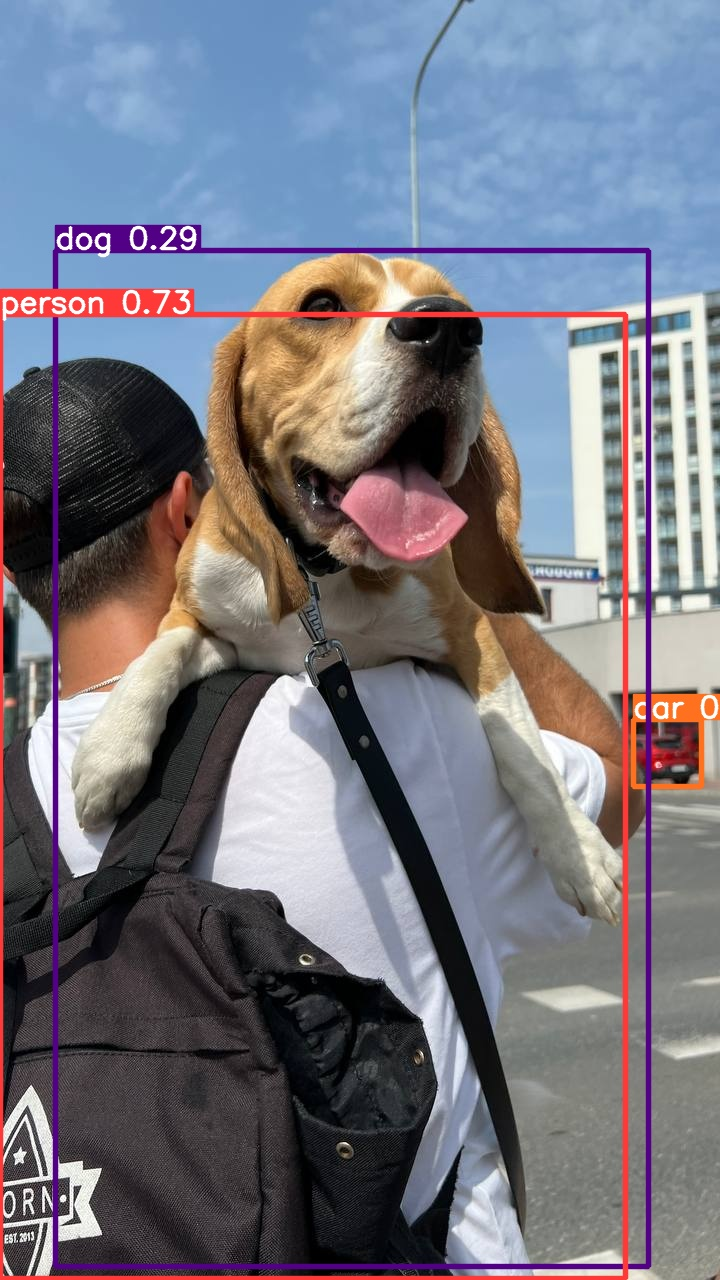

In [28]:
# %cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [6]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /home/coulm/clone/detection_image/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 38.7ms
Speed: 1.6ms preprocess, 38.7ms inference, 194.9ms postprocess per image at shape (1, 3, 640, 384)


In [7]:
results[0].boxes.xyxy

tensor([[   0.0000,  314.4716,  625.0755, 1278.1947],
        [  55.1730,  250.0220,  648.1080, 1266.2720],
        [ 633.2291,  719.5391,  701.0538,  786.0336]], device='cuda:0')

In [8]:
results[0].boxes.conf

tensor([0.7271, 0.2907, 0.2846], device='cuda:0')

In [9]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

## Custom Training

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
%cd ..


/home/coulm/clone/detection_image


/home/coulm/clone/detection_image/.venv/lib64/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [29]:

!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=25 imgsz=224 plots=True

Ultralytics YOLOv8.1.2 🚀 Python-3.10.13 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce GTX 1080, 8111MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=25, time=None, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxe

In [27]:
train_n = "" # if 0 let empty

In [16]:
!ls runs/detect/train/

args.yaml				       results.png
confusion_matrix_normalized.png		       train_batch0.jpg
confusion_matrix.png			       train_batch120.jpg
events.out.tfevents.1705499409.fedora.37320.0  train_batch121.jpg
F1_curve.png				       train_batch122.jpg
labels_correlogram.jpg			       train_batch1.jpg
labels.jpg				       train_batch2.jpg
P_curve.png				       val_batch0_labels.jpg
PR_curve.png				       val_batch0_pred.jpg
R_curve.png				       weights
results.csv


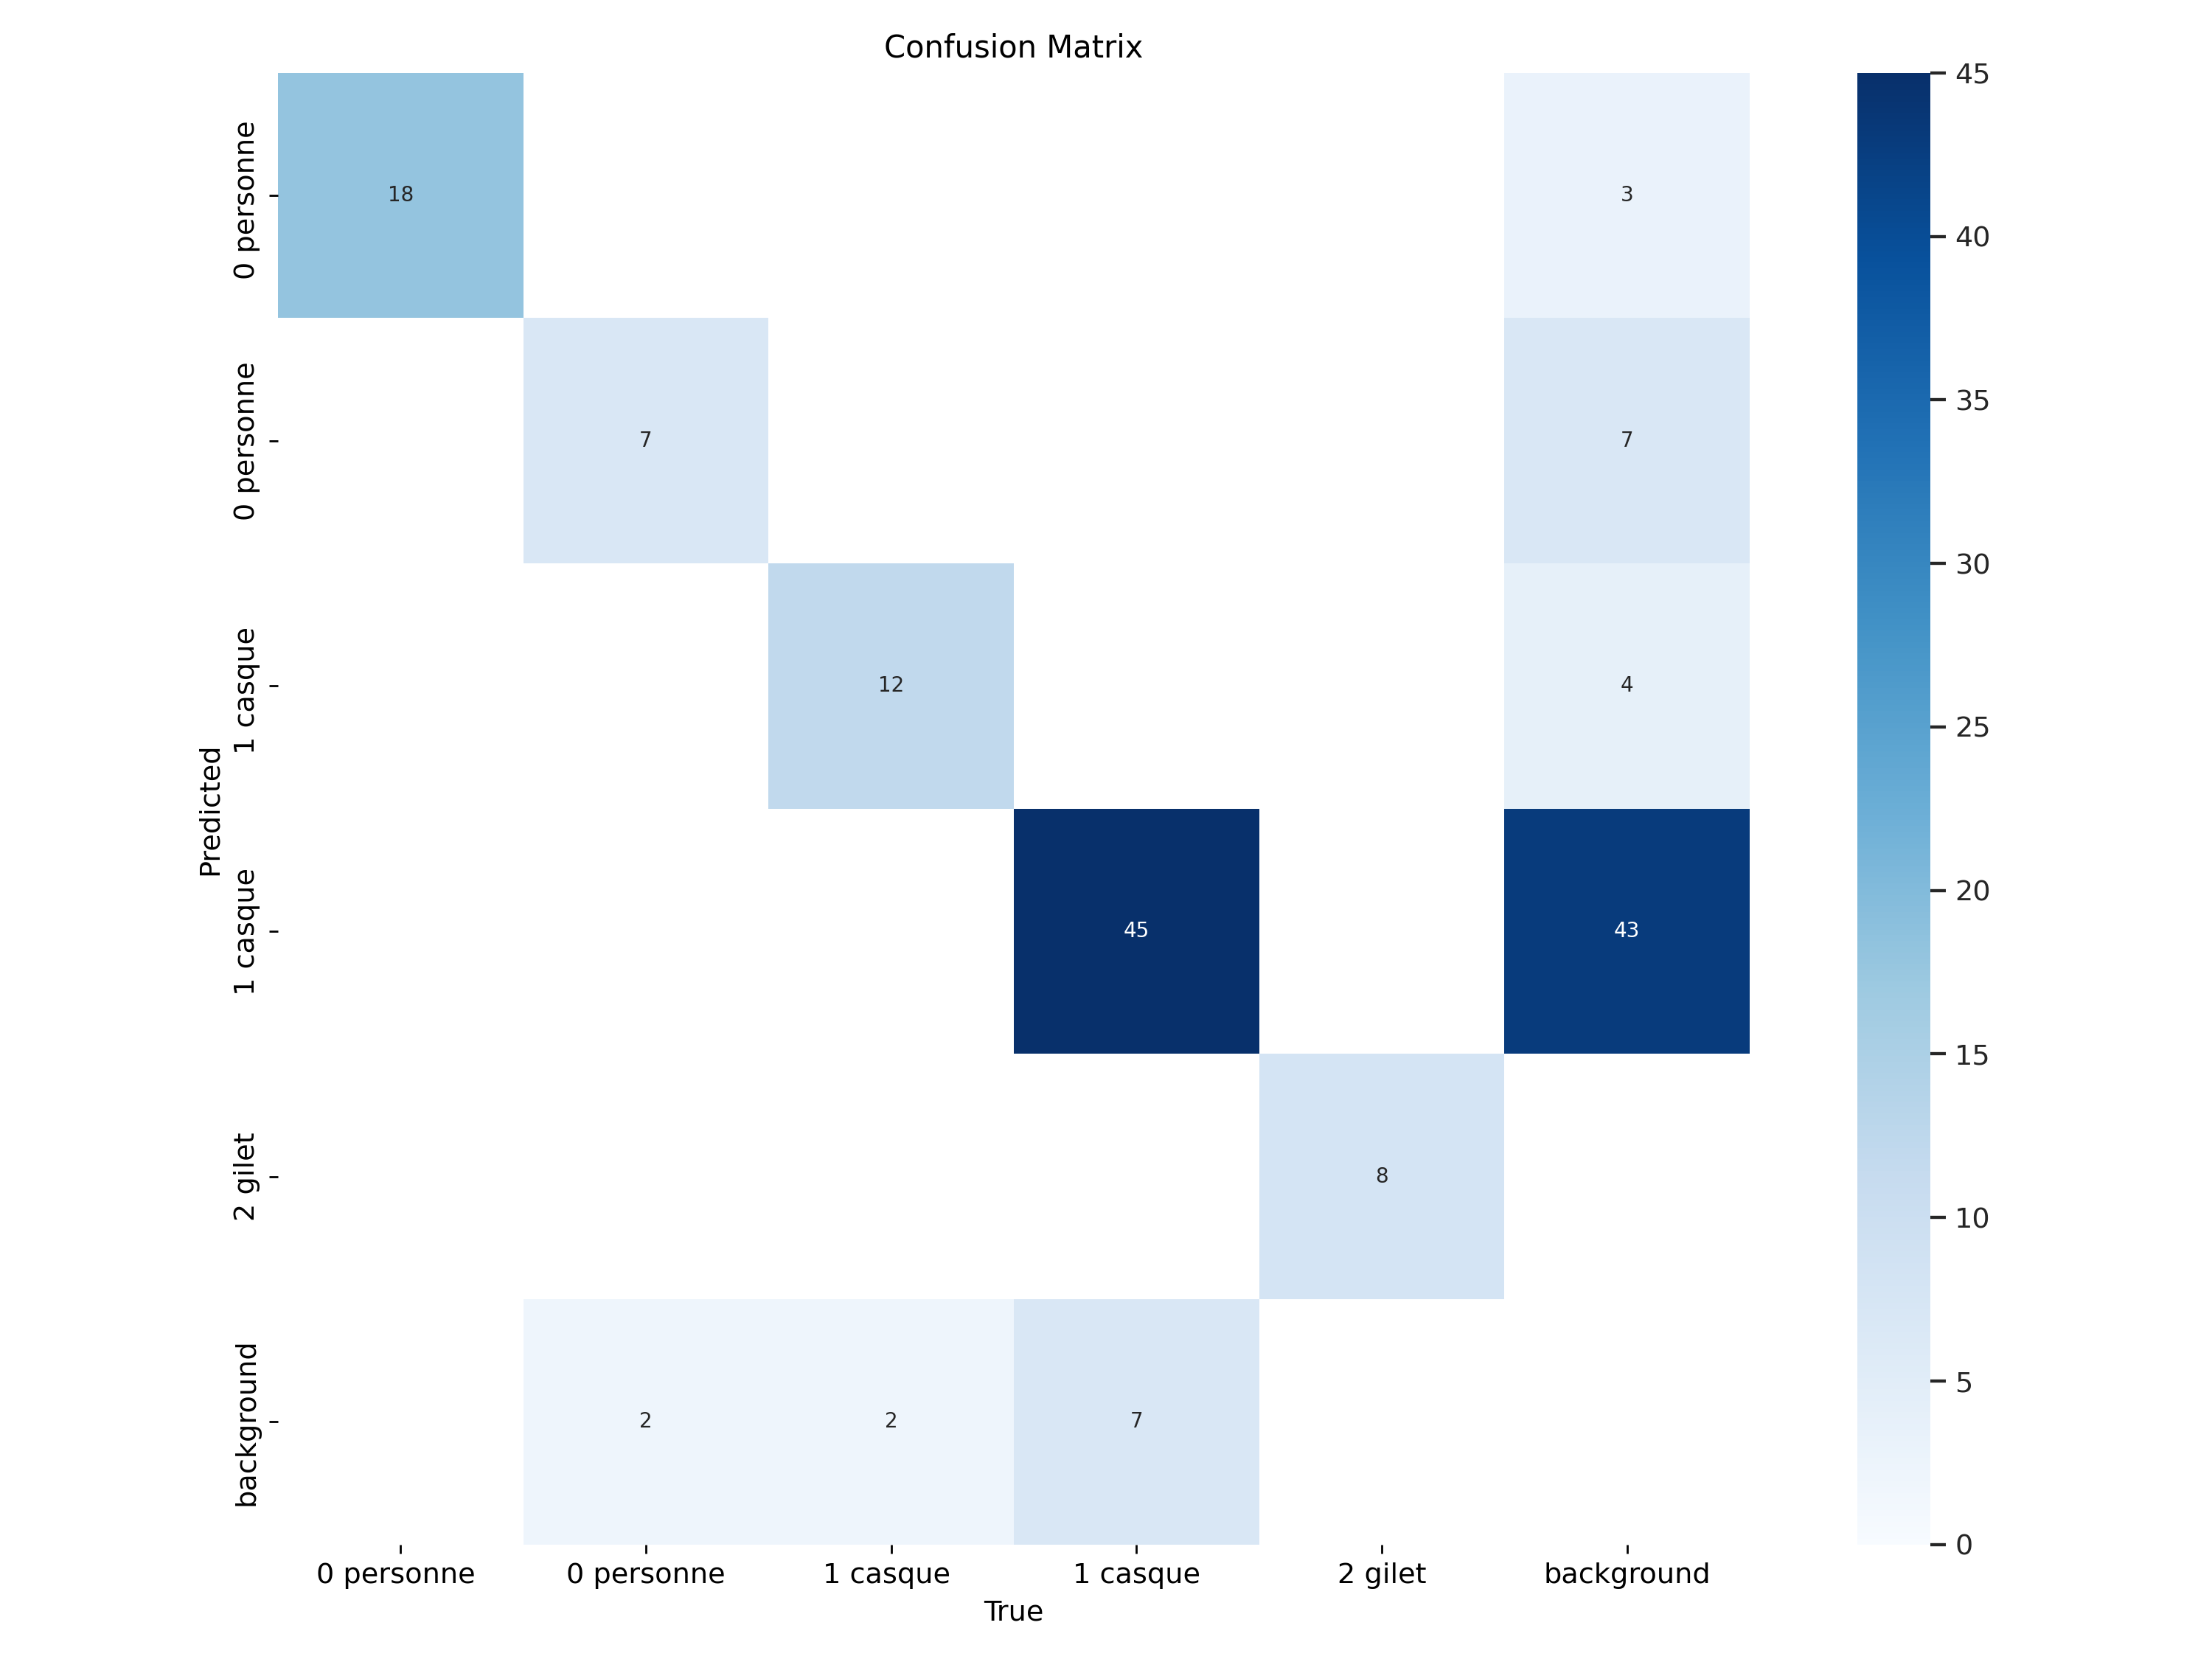

In [18]:
Image(filename=f'runs/detect/train{train_n}/confusion_matrix.png', width=600)

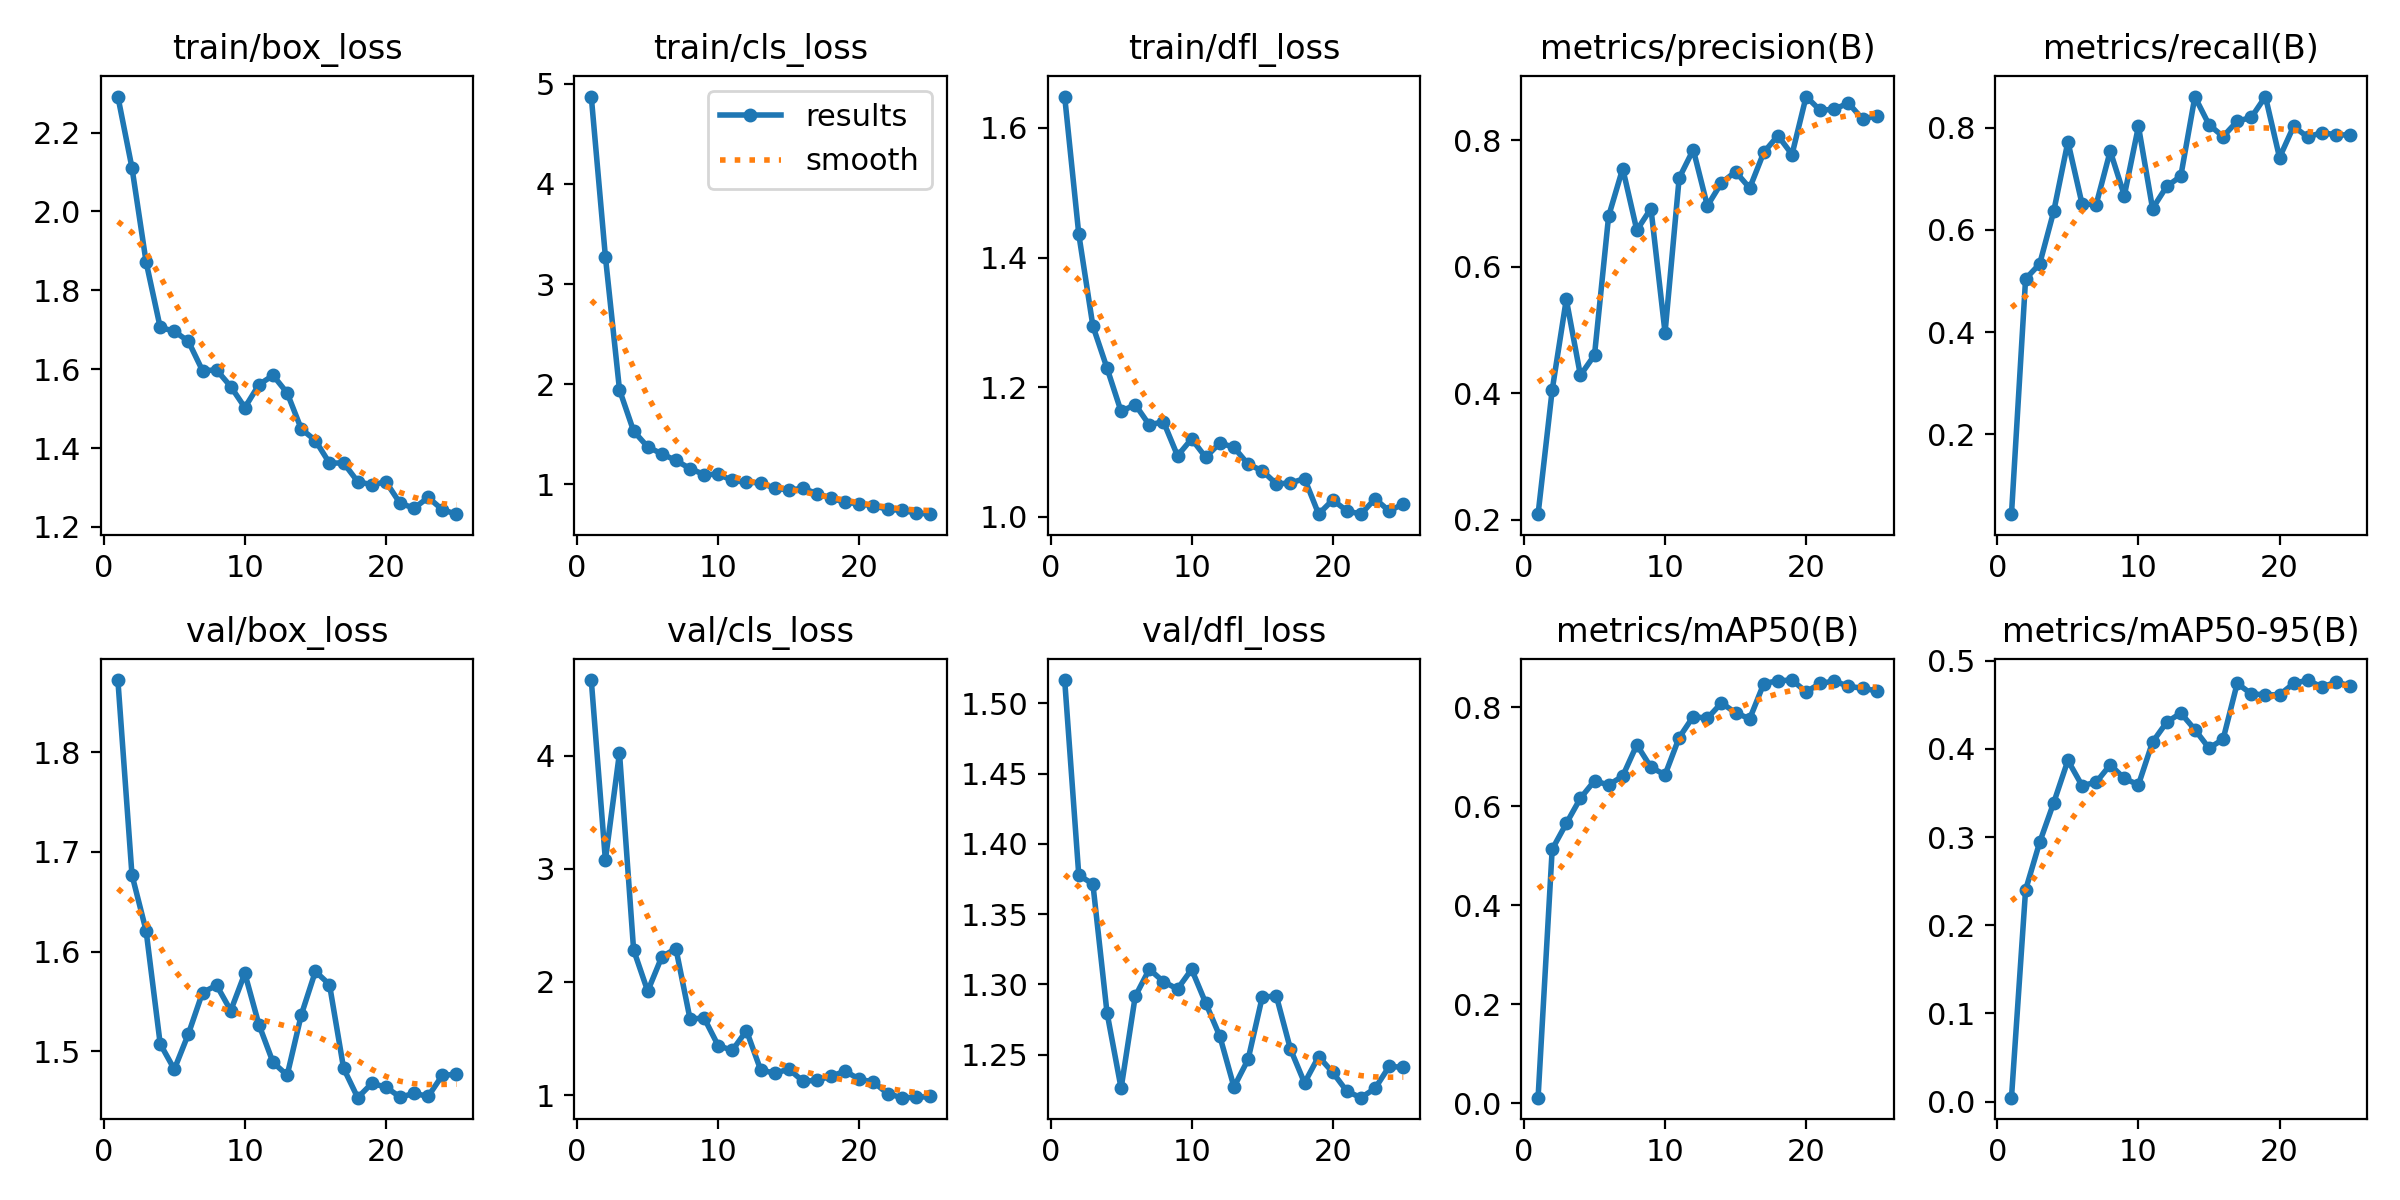

In [19]:
Image(filename=f'runs/detect/train{train_n}/results.png', width=600)

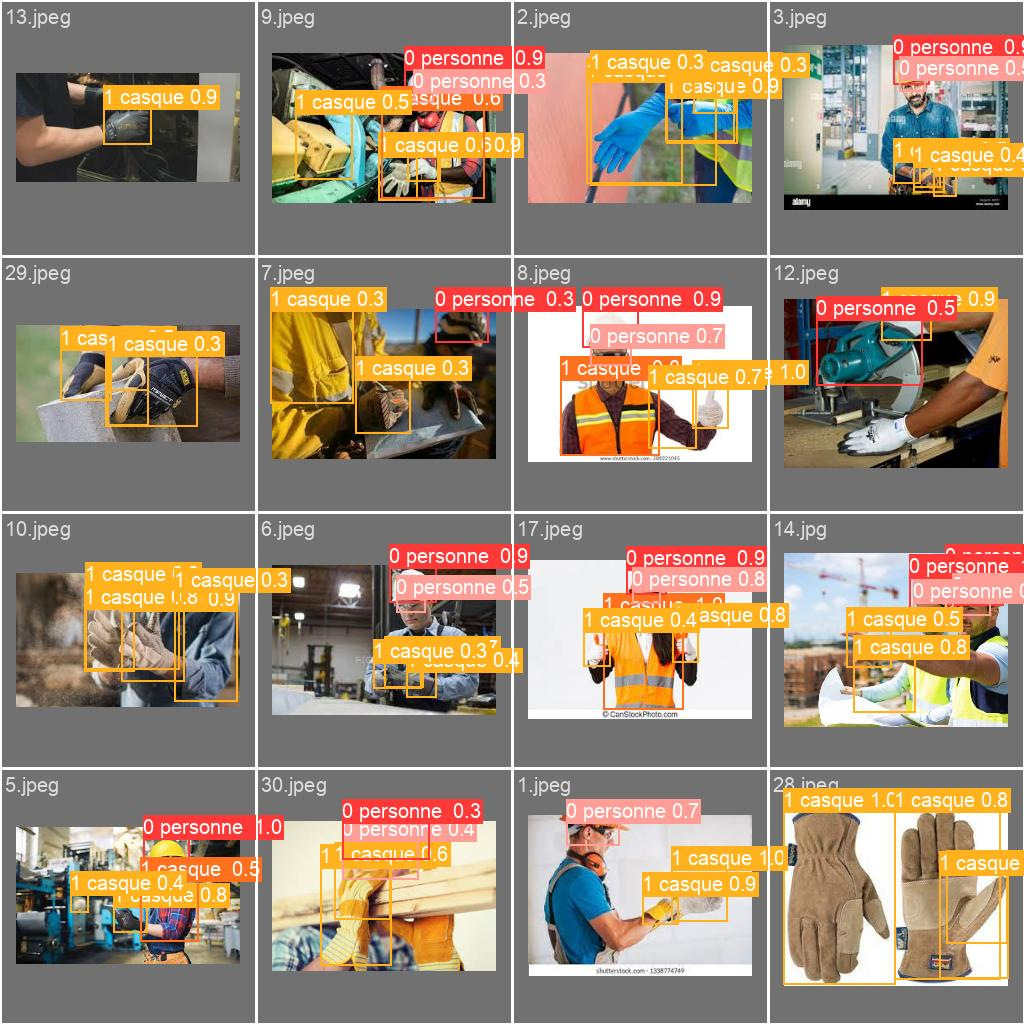

In [20]:
Image(filename=f'runs/detect/train{train_n}/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [21]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

Ultralytics YOLOv8.1.2 🚀 Python-3.10.13 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce GTX 1080, 8111MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /home/coulm/clone/detection_image/datasets/valid/labels.cache... 3
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         31        101      0.813      0.803      0.844      0.473
           0 personne          31         18      0.963          1      0.995      0.664
            0 personne         31          9      0.572      0.556      0.656      0.256
             1 casque          31         14      0.922      0.846      0.872      0.568
              1 casque         31         52      0.615      0.615      0.701      0.405
               2 gilet         31          8      0.995          1      0.995      0.471
Speed: 0.4ms preprocess, 7.1ms inference, 0.0ms loss, 6.3ms postprocess per image
Results saved to runs/detect/val
💡 Learn 

## Inference with Custom Model

In [23]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=datasets/test/images

Ultralytics YOLOv8.1.2 🚀 Python-3.10.13 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce GTX 1080, 8111MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs

image 1/31 /home/coulm/clone/detection_image/datasets/test/images/1.jpeg: 192x224 1 0 personne, 2 1 casques, 25.9ms
image 2/31 /home/coulm/clone/detection_image/datasets/test/images/10.jpeg: 160x224 3 1 casques, 26.6ms
image 3/31 /home/coulm/clone/detection_image/datasets/test/images/11.jpeg: 224x224 5 1 casques, 4.2ms
image 4/31 /home/coulm/clone/detection_image/datasets/test/images/12.jpeg: 192x224 1 0 personne , 1 1 casque, 4.3ms
image 5/31 /home/coulm/clone/detection_image/datasets/test/images/13.jpeg: 128x224 1 1 casque, 25.0ms
image 6/31 /home/coulm/clone/detection_image/datasets/test/images/14(1).jpeg: 224x224 2 1 casques, 4.3ms
image 7/31 /home/coulm/clone/detection_image/datasets/test/images/14.jpg: 192x224 2 0 personne s, 2 0 personnes, 2 1 casques, 4.4ms
image 8/31 /home/coulm/clone/detection_ima

**NOTE:** Let's take a look at few results.

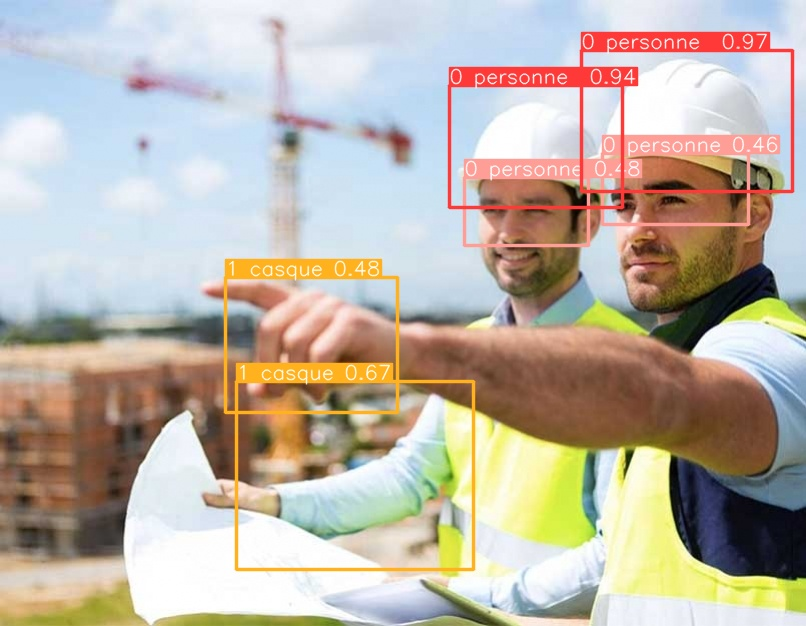

In [46]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")


image 1/1 /home/coulm/clone/detection_image/datasets/test/images/000014_jpg.rf.71ddf77d5a267419d1fbd65989f90e7f.jpg: 224x224 1 0 personne , 1 1 casque, 4.3ms
Speed: 0.4ms preprocess, 4.3ms inference, 1.2ms postprocess per image at shape (1, 3, 224, 224)




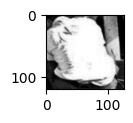

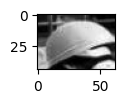

In [53]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
# Charger le modèle
model = YOLO("runs/detect/train/weights/best.pt")

# Exécuter la détection
results = model.predict(source="datasets/test/images/000014_jpg.rf.71ddf77d5a267419d1fbd65989f90e7f.jpg")

for result in results:
 # Les boîtes sont dans le format (xmin, ymin, xmax, ymax)
 boxes = result.boxes.xyxy.cpu().tolist()
 
 # Les classes sont également dans la liste
 clss = result.boxes.cls.cpu().tolist()
 
 for box, cls in zip(boxes, clss):
    # Découper l'objet de l'image
    crop_obj = result.orig_img[int(box[1]):int(box[3]), int(box[0]):int(box[2])]
    
    Image(crop_obj, width=600)
    print("\n")
        
    # Afficher l'image découpée
    plt.figure(figsize=(1,1))
    plt.imshow(cv2.cvtColor(crop_obj, cv2.COLOR_BGR2RGB))

    plt.show()

In [35]:
from ultralytics import YOLO
import cv2

# Charger le modèle
model = YOLO("runs/detect/train/weights/best.pt")

# Exécuter la détection
results = model.predict(source="datasets/test/images")

for result in results:
 # Les boîtes sont dans le format (xmin, ymin, xmax, ymax)
 boxes = result.boxes.xyxy.cpu().tolist()
 
 # Les classes sont également dans la liste
 clss = result.boxes.cls.cpu().tolist()
 
 for box, cls in zip(boxes, clss):
     # Découper l'objet de l'image
     crop_obj = result.orig_img[int(box[1]):int(box[3]), int(box[0]):int(box[2])]
     
     # Extraire le nom du fichier à partir du chemin du fichier
     filename = os.path.basename(result.path)
     
     # Sauvegarder l'objet découpé
     cv2.imwrite(f"./resultat/{model.names[int(cls)]}_{filename}", crop_obj)


image 1/40 /home/coulm/clone/detection_image/datasets/test/images/000014_jpg.rf.71ddf77d5a267419d1fbd65989f90e7f.jpg: 224x224 1 0 personne , 1 1 casque, 3.8ms
image 2/40 /home/coulm/clone/detection_image/datasets/test/images/000049_jpg.rf.26fa9cfe877ada75305e1a26535c331b.jpg: 224x224 1 0 personne , 1 1 casque, 4.3ms
image 3/40 /home/coulm/clone/detection_image/datasets/test/images/000099_jpg.rf.bf160b19ba04d6331a8a2c0a0482c610.jpg: 224x224 1 0 personne , 1 1 casque, 3.9ms
image 4/40 /home/coulm/clone/detection_image/datasets/test/images/000213_jpg.rf.232a18541a0b171c8a10612eef826b19.jpg: 224x224 3 0 personne s, 1 1 casque, 4.4ms
image 5/40 /home/coulm/clone/detection_image/datasets/test/images/000248_jpg.rf.28877566905f19b1566de7eee036690e.jpg: 224x224 1 0 personne , 1 1 casque, 4.0ms
image 6/40 /home/coulm/clone/detection_image/datasets/test/images/000261_jpg.rf.303f046afc57086eb10e55a889e1bbe3.jpg: 224x224 1 1 casque, 4.0ms
image 7/40 /home/coulm/clone/detection_image/datasets/test/


image 1/1 /home/coulm/clone/detection_image/datasets/test/images/000014_jpg.rf.71ddf77d5a267419d1fbd65989f90e7f.jpg: 224x224 1 0 personne , 1 1 casque, 4.7ms
Speed: 0.4ms preprocess, 4.7ms inference, 0.8ms postprocess per image at shape (1, 3, 224, 224)


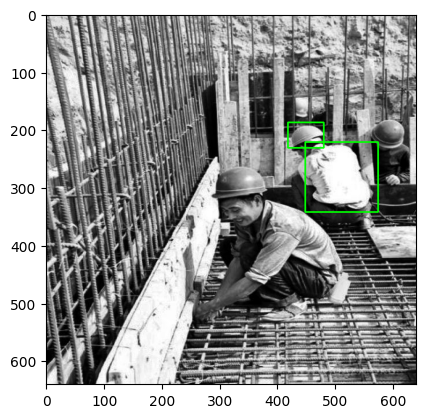

In [52]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os

# Charger le modèle
model = YOLO("runs/detect/train/weights/best.pt")

# Exécuter la détection
results = model.predict(source="datasets/test/images/000014_jpg.rf.71ddf77d5a267419d1fbd65989f90e7f.jpg")

# Traiter les résultats
for result in results:
  # Les boîtes sont dans le format (xmin, ymin, xmax, ymax)
  boxes = result.boxes.xyxy.cpu().tolist()
  
  # Les classes sont également dans la liste
  clss = result.boxes.cls.cpu().tolist()
  
  for box, cls in zip(boxes, clss):
      # Dessiner les boîtes englobantes sur l'image originale
      cv2.rectangle(result.orig_img, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), (0, 255, 0), 2)
      
      # Convertir l'image en RGB pour l'afficher avec matplotlib
      img_rgb = cv2.cvtColor(result.orig_img, cv2.COLOR_BGR2RGB)
      
      # Afficher l'image avec les boîtes englobantes
  plt.imshow(img_rgb)
  plt.show()